In [1]:
# !pip install tensorflow

In [2]:
# !pip install tensorflow graphviz pydot

In [12]:
import zipfile
with zipfile.ZipFile('./skin-cancer-malignant-vs-benign.zip','r') as zip_ref:
    zip_ref.extractall('./skin_cancer')

In [13]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pretreined_model = VGG16(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
    )
pretreined_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [14]:
model = Sequential()
model.add(pretreined_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
pretreined_model.trainable = False

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    os.path.join('skin_cancer', 'train'),
    target_size=(150, 150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join('skin_cancer', 'test'),
    target_size=(150, 150),
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/50
83/83 [==============================] - 229s 3s/step - loss: 0.7329 - accuracy: 0.7103 - val_loss: 0.5536 - val_accuracy: 0.7470
Epoch 2/50
83/83 [==============================] - 228s 3s/step - loss: 0.4704 - accuracy: 0.7766 - val_loss: 0.4077 - val_accuracy: 0.8242
Epoch 3/50
83/83 [==============================] - 228s 3s/step - loss: 0.4412 - accuracy: 0.7937 - val_loss: 0.4243 - val_accuracy: 0.7864
Epoch 4/50
83/83 [==============================] - 232s 3s/step - loss: 0.3919 - accuracy: 0.8172 - val_loss: 0.6871 - val_accuracy: 0.6955
Epoch 5/50
83/83 [==============================] - 298s 4s/step - loss: 0.4006 - accuracy: 0.8130 - val_loss: 0.3615 - val_accuracy: 0.8167
Epoch 6/50
83/83 [==============================] - 438s 5s/step - loss: 0.3850 - accuracy: 0.8203 - val_loss: 0.4113 - val_accuracy: 0.7939
Epoch 7/50
83/83 [==============================] - 431s 5s/step - loss

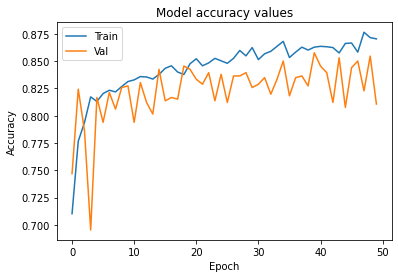

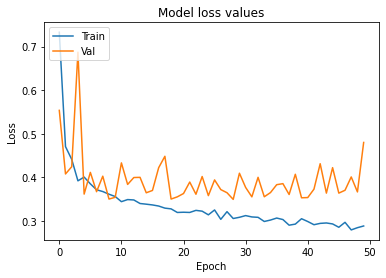

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()